---
Análisis de ruido de Madrid, Grupo 3
---
---

# Preparación para poder ejecutar el código

1. Tener instalado Visual Studio Code u otro IDE de programación que acepte python
2. Abrir la terminal, en caso de que no aparezca pulsar ctrl+shift+ñ: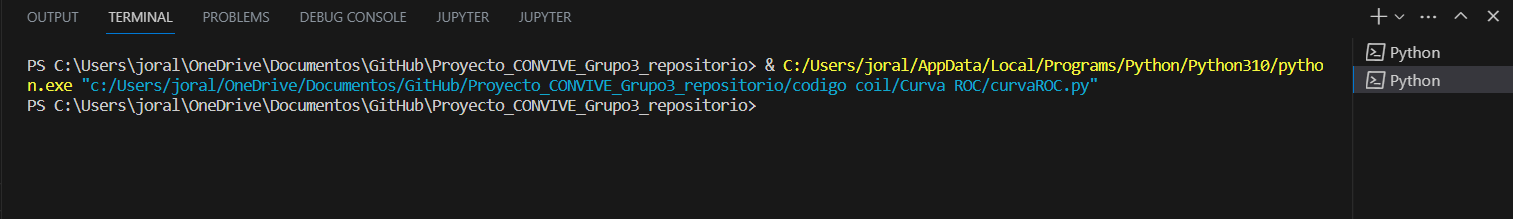 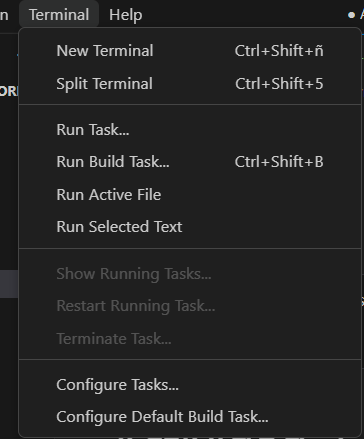
3. Una vez en la terminal, pulsar encima y escribir lo siguiente para descargar las librerías necesarias para la ejecución: 
pip install -r requirements.txt y darle al enter
4. Darle a la tecla de Run All ene la parte superior de la pantalla 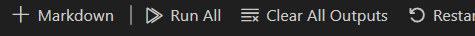
5. Como hay un código que entrena un modelo de aprendizaje, recomendamos ir a la parte donde se encuentra el siguiente texto, y en el codigo que hay debajo, pulsar el cuadrado de pausa. 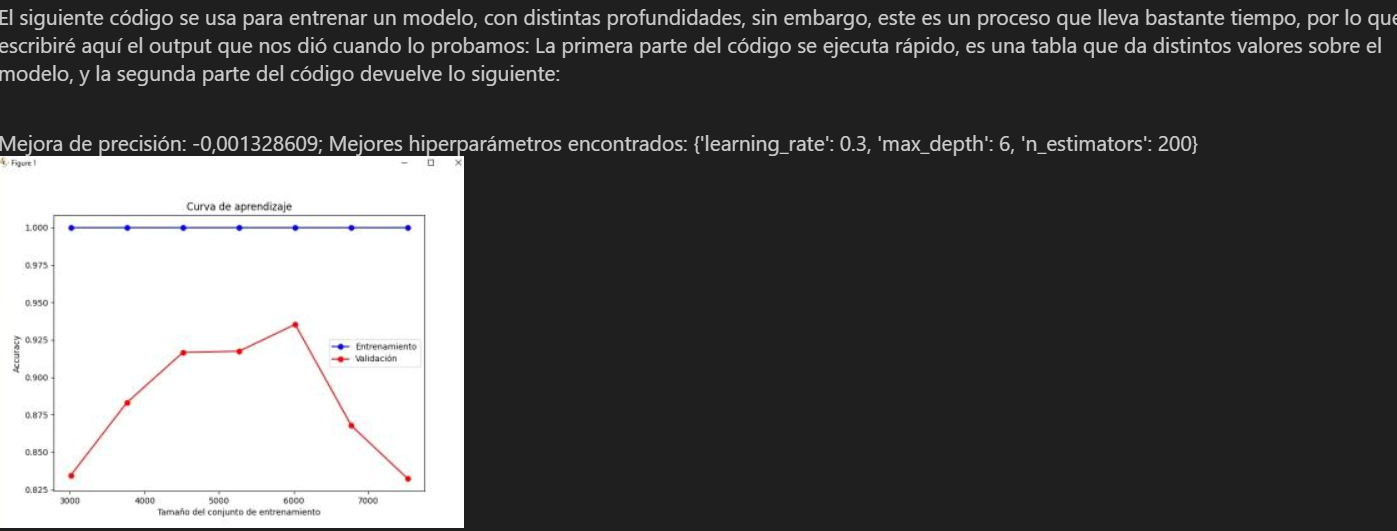 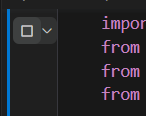
6. En caso de no pausarlo es posible que el ordenador empiece a consumir recursos bajando el rendimiento del mismo
7. Para la comprensión del csv leer PDF llamado INTERPRETE DE ARCHIVO DE DATOS, el cual se localiza en esta misma carpeta.

# Actividad 2

Selección de la base de datos:

La base de datos fue extraída del siguiente enlace: https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=0ea1417c43dd1710VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default
Se eligió la siguiente base de datos para su estudio: dentro de esta carpeta se encuentra un csv llamado Ruido_diario_acumulado_original, el cual fue modificandose para facilitar su análisis.

Este código fue usado para transformar la columna tipo, de una variable cualitativa a 4 variables separadas en los distintos valores que podía tomar la misma: tipo_D, tipo_N, tipo_T, tipo_E, de naturaleza booleana, es decir, 1 y 0, si es 1 significa que fue estudiado durante el periodo del tipo, y si es 0 no fue estudiado durante ese periodo. Ejemplo: Tipo_D = 1.0: significa que los datos fueron tomados durante el periodo diurno.

In [14]:
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd

# df = pd.read_csv('codigo coil/Ruido_diario_acumulado.csv', sep=';')
# df = df.replace(',', '.', regex=True)

# ohe = OneHotEncoder()
# resultado_ohe = ohe.fit_transform(df[['tipo']])
# columnas_ohe = ohe.get_feature_names_out(['tipo'])
# df_ohe = pd.DataFrame(resultado_ohe.toarray(), columns=columnas_ohe)

# df_modificado = df.join(df_ohe, rsuffix='_ohe').drop(['tipo'], axis=1)

# # Agregar una columna de ID
# df_modificado.insert(0, 'ID', range(1, 1+len(df_modificado)))

# print(df.isna().any().sum())
# print(df.isnull().any().sum())
# # Guardar el csv modificado con la columna de ID
# df_modificado.to_csv('codigo coil/Ruido_diario_acumulado_id_modificado.csv', sep=';', index=False)

Y este fue usado para generar los csv de las distintas estaciones de estudio (NMT)

In [15]:
# import pandas as pd
# import config as cfg

# # Cargar el csv
# df = pd.read_csv(cfg.DATABASE_PATH, sep=';')

# # Separar el fichero en otros ficheros en funcion del NMT, numeros de 1 a 86 que esten en la columna NMT
# for i in range(1, 87):
#     df[df['NMT'] == i].to_csv('codigo coil/NMT' + str(i) + '.csv', index=False, sep=';') if not df[df['NMT'] == i].empty else None

# Actividad 4

Importamos las librerías necesarias para trabajar con los datos:

In [19]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

Usamos la función DecisionTreeClassifier de sklearn para crear un árbol de decisión y ver la precisión del modelo clusterizado

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Cargar el csv
df = pd.read_csv('clusterizado_1.csv', sep=';')

# Separar en X e y
X = df.drop(['cluster'], axis=1)
y = df['cluster']

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) #nos permite dividir un dataset en dos bloques, típicamente bloques destinados al entrenamiento y validación del modelo (llamemos a estos bloques "bloque de entrenamiento " y "bloque de pruebas" para mantener la coherencia con el nombre de la función).

# Crear el modelo
model = DecisionTreeClassifier(random_state=100)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el modelo
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
print('Precisión del modelo: ', accuracy_score(y_test, y_pred))

# Mostrar las importancias de cada variable
importances = model.feature_importances_

# hacer grafico por bigotes
plt.boxplot(importances)

# Mostrar el gráfico
plt.show()

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# # Cargar el csv
# df = pd.read_csv('clusterizado_2.csv', sep=';')

# # Separar en X e y
# X = df.drop(['cluster'], axis=1)
# y = df['cluster']

# # Separar en train y test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) #nos permite dividir un dataset en dos bloques, típicamente bloques destinados al entrenamiento y validación del modelo (llamemos a estos bloques "bloque de entrenamiento " y "bloque de pruebas" para mantener la coherencia con el nombre de la función).

# # Crear el modelo
# model = DecisionTreeClassifier(random_state=100)

# # Entrenar el modelo
# model.fit(X_train, y_train)

# # Predecir con el modelo
# y_pred = model.predict(X_test)

# # Calcular la precisión del modelo
# print('Precisión del modelo: ', accuracy_score(y_test, y_pred))

# # Mostrar las importancias de cada variable
# importances = model.feature_importances_

# # hacer grafico por bigotes
# plt.boxplot(importances)

# # Mostrar el gráfico
# plt.show()

NameError: name 'pd' is not defined

Podemos ver que nos da una precisión el modelo de 0.98.

A continuación usamos otras funciones de sklearn para representar los puntos en un gráfico con el fin de ver la recta de regresión.
Para esto trabajaremos únicamente con los csv de 4 estaciones meteorológicas (NMT del 1 al 4) para simplificar un poco y no mostrar los 30 gráficos que hay. En caso de querer trabajar con la estación NMT5 por ejemplo, habría que cambiar en el código la línea:

In [ ]:
# df = pd.read_csv('NMT1.csv', sep=';') por df = pd.read_csv('NMT5.csv', sep=';')

y la línea final, con el fin de no sobreescribir el csv, de: 


In [ ]:
# df.to_csv('clusterizado_1.csv', index=False, sep=';') a df.to_csv('clusterizado_5.csv', index=False, sep=';')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Cargar el csv
df = pd.read_csv('NMT1.csv', sep=';')

# Leer el archivo csv y crear un DataFrame de Pandas
data = df[['anio', 'mes', 'dia', 'LAEQ', 'LAS01', 'LAS10', 'LAS50', 'LAS90', 'LAS99', 'tipo_D', 'tipo_E', 'tipo_N', 'tipo_T']]

# Normalizamos los datos para que todas las columnas tengan la misma escala
scaler = StandardScaler()
data_norm = scaler.fit_transform(data)

# Seleccionar el número de clusters y aplucar el algoritmo de clusterización
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_norm)

# Agregar las etiquetas de cluster al DataFrame original
df['cluster'] = kmeans.labels_

#Guardar el DataFrame en un nuevo archivo csv
df.to_csv('clusterizado_1.csv', index=False, sep=';')

In [ ]:
from sklearn.cluster import KMeans

# Cargar el csv
df = pd.read_csv('NMT2.csv', sep=';')

# Leer el archivo csv y crear un DataFrame de Pandas
data = df[['anio', 'mes', 'dia', 'LAEQ', 'LAS01', 'LAS10', 'LAS50', 'LAS90', 'LAS99', 'tipo_D', 'tipo_E', 'tipo_N', 'tipo_T']]

# Normalizamos los datos para que todas las columnas tengan la misma escala
scaler = StandardScaler()
data_norm = scaler.fit_transform(data)

# Seleccionar el número de clusters y aplucar el algoritmo de clusterización
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_norm)

# Agregar las etiquetas de cluster al DataFrame original
df['cluster'] = kmeans.labels_

#Guardar el DataFrame en un nuevo archivo csv
df.to_csv('clusterizado_2.csv', index=False, sep=';')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar el csv
df = pd.read_csv('NMT3.csv', sep=';')

# Leer el archivo csv y crear un DataFrame de Pandas
data = df[['anio', 'mes', 'dia', 'LAEQ', 'LAS01', 'LAS10', 'LAS50', 'LAS90', 'LAS99', 'tipo_D', 'tipo_E', 'tipo_N', 'tipo_T']]

# Normalizamos los datos para que todas las columnas tengan la misma escala
scaler = StandardScaler()
data_norm = scaler.fit_transform(data)

# Seleccionar el número de clusters y aplucar el algoritmo de clusterización
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_norm)

# Agregar las etiquetas de cluster al DataFrame original
df['cluster'] = kmeans.labels_

#Guardar el DataFrame en un nuevo archivo csv
df.to_csv('clusterizado_3.csv', index=False, sep=';')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar el csv
df = pd.read_csv('NMT4.csv', sep=';')

# Leer el archivo csv y crear un DataFrame de Pandas
data = df[['anio', 'mes', 'dia', 'LAEQ', 'LAS01', 'LAS10', 'LAS50', 'LAS90', 'LAS99', 'tipo_D', 'tipo_E', 'tipo_N', 'tipo_T']]

# Normalizamos los datos para que todas las columnas tengan la misma escala
scaler = StandardScaler()
data_norm = scaler.fit_transform(data)

# Seleccionar el número de clusters y aplucar el algoritmo de clusterización
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_norm)

# Agregar las etiquetas de cluster al DataFrame original
df['cluster'] = kmeans.labels_

#Guardar el DataFrame en un nuevo archivo csv
df.to_csv('clusterizado_4.csv', index=False, sep=';')

Una vez generados los csv clusterizados, para poder tratarlos, los representaremos mediante un diagrama de punto, y mostraremos su recta de regresión lineal:

In [ ]:
# Cargar el csv
df = pd.read_csv('clusterizado_1.csv', sep=';')

# Gráfico de dispersión
fig, axs = plt.subplots(2, 2)

for i, ax in enumerate(axs.flatten()):
    if i+1 > 4: break  # en caso de haber más de 4 archivos
    dftemp = pd.read_csv(f'clusterizado_{i+1}.csv', sep=';')
    ax.scatter(dftemp['dia'], dftemp['LAEQ'], c=dftemp['cluster'])
    ax.set_title(f'NMT{i+1}')
    ax.set_xlabel('dia')
    ax.set_ylabel('LAEQ')

    # Línea de regresión
    x = dftemp['dia']
    y = dftemp['LAEQ']
    coeffs = np.polyfit(x, y, 1)
    poly_eqn = np.poly1d(coeffs)
    ax.plot(x, poly_eqn(x), color='red')

    # Coeficiente de correlación
    corr = np.corrcoef(x, y)[0, 1]
    ax.text(0.05, 0.95, f'Corr: {corr:.2f}', transform=ax.transAxes, ha='left', va='top')

plt.show()

KeyboardInterrupt: 

En la parte de los gráficos donde pone Corr: se refiere a la correlación siendo: 1-Corr, siendo cercanas a 1:

Ahora, mediante la librería xgboost y sklearn usando, el csv de NMT1 clusterizado, entrenaremos un modelo, capaz de generar un árbol binario.

In [ ]:
# Aplicar XGBoost Classifier con los parámetros por defecto y reportar el accuracy score sobre el conjunto de test sobre la base NMT 1

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el csv
df = pd.read_csv('clusterizado_1.csv', sep=';')

# Separar en X e y
X = df.drop(['cluster'], axis=1)
y = df['cluster']

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear el modelo
model_2 = xgb.XGBClassifier()

# Entrenar el modelo
model_2.fit(X_train, y_train)

# Predecir con el modelo
y_pred = model_2.predict(X_test)

# Calcular la precisión del modelo
print('Precisión del modelo: ', accuracy_score(y_test, y_pred))

# Mostrar las importancias de cada variable
importances = model_2.feature_importances_

#Calcular la profundidad del arbol generado
print('Profundidad del arbol: ', model_2.get_booster().get_dump()[0].count('\t'))

Precisión del modelo:  0.9893711248892826
Profundidad del arbol:  162


Podemos ver aquí, que la precisión del modelo es cercana a 1, y la profundidad del árbol se encuentra entre 150 y 250, dependiendo de como se entrene el modelo.

El siguiente código se usa para entrenar un modelo, con distintas profundidades, sin embargo, este es un proceso que lleva bastante tiempo, por lo que escribiré aquí el output que nos dió cuando lo probamos: La primera parte del código se ejecuta rápido, es una tabla que da distintos valores sobre el modelo, y la segunda parte del código devuelve lo siguiente:

Mejora de precisión: -0,001328609; 
Mejores hiperparámetros encontrados:  {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 200}
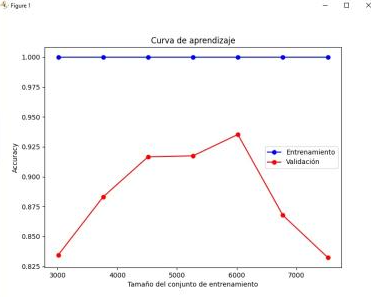

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import learning_curve

# Cargar el csv
df = pd.read_csv('clusterizado_1.csv', sep=';')

# Separar en X e y
X = df.drop(['cluster'], axis=1)
y = df['cluster']

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Crear el modelo con los valores por defecto
model_default = xgb.XGBClassifier(random_state=100)

# Entrenar el modelo por defecto
model_default.fit(X_train, y_train)

# Predecir con el modelo por defecto
y_pred_default = model_default.predict(X_test)

# Calcular la precisión y el F1-score del modelo por defecto
accuracy_default = accuracy_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default, average='weighted')
classification_report_default = classification_report(y_test, y_pred_default, zero_division=0)

print('Precisión del modelo por defecto: ', accuracy_default)
print('F1-score del modelo por defecto: ', f1_default)
print('Classification report del modelo por defecto:\n', classification_report_default)

# Curva de complejidad
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': range(6, 21, 2),
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
}

grid = GridSearchCV(estimator=model_default, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados: ", grid.best_params_)
print("Mejor score de validación cruzada: {:.2f}".format(grid.best_score_))

# Crear un nuevo modelo con los valores óptimos de los hiperparámetros
model_optimized = xgb.XGBClassifier(
    n_estimators=grid.best_params_['n_estimators'],
    max_depth=grid.best_params_['max_depth'],
    learning_rate=grid.best_params_['learning_rate'],
    random_state=100)

# Entrenar el modelo optimizado
model_optimized.fit(X_train, y_train)

# Predecir con el modelo optimizado
y_pred_optimized = model_optimized.predict(X_test)

# Calcular la precisión y el F1-score del modelo optimizado
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized, average='weighted')
classification_report_optimized = classification_report(y_test, y_pred_optimized, zero_division=0)

print('Precisión del modelo optimizado: ', accuracy_optimized)
print('F1-score del modelo optimizado: ', f1_optimized)
print('Classification report del modelo optimizado:\n', classification_report_optimized)

# Comparar las precisiones de los modelos
print('Mejora de precisión:', accuracy_optimized - accuracy_default)

# Función para plotear la curva de aprendizaje
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=3, n_jobs=-1, 
                                                            train_sizes=np.linspace(0.1, 1.0, 10), 
                                                            scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Entrenamiento')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='Validación')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Accuracy')
    plt.title('Curva de aprendizaje')
    plt.legend(loc='best')
    plt.show()

# Crear y mostrar la curva de aprendizaje
plot_learning_curve(model_optimized, X, y)

Precisión del modelo por defecto:  0.9929140832595217
F1-score del modelo por defecto:  0.992914200563442
Classification report del modelo por defecto:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       467
           1       0.99      1.00      0.99       990
           2       0.99      0.99      0.99       801

    accuracy                           0.99      2258
   macro avg       0.99      0.99      0.99      2258
weighted avg       0.99      0.99      0.99      2258

Fitting 3 folds for each of 160 candidates, totalling 480 fits


KeyboardInterrupt: 

En la siguiente parte del código nos centraremos en ver la precisión de distintos modelos sobre nuestra base de datos e imprimiremos la curva de aprendizaje dada por la distribucion de Gauss o Normal.

GaussianNB Accuracy: 0.7909654561558902
GaussianNB F1 Score: 0.7821891298293465
GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.44      0.50       467
           1       0.83      0.92      0.87       990
           2       0.84      0.83      0.84       801

    accuracy                           0.79      2258
   macro avg       0.75      0.73      0.74      2258
weighted avg       0.78      0.79      0.78      2258

MultinomialNB Accuracy: 0.5823737821080602
MultinomialNB F1 Score: 0.5643485232756518
MultinomialNB Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.23      0.36       467
           1       0.62      0.65      0.63       990
           2       0.52      0.70      0.60       801

    accuracy                           0.58      2258
   macro avg       0.65      0.53      0.53      2258
weighted avg       0.62      0.58      0.56      2258


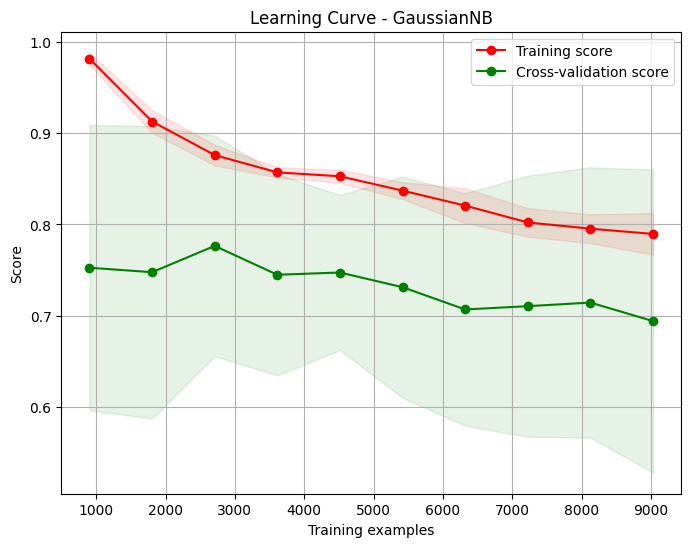

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# cargar el conjunto de datos
df = pd.read_csv('clusterizado_1.csv', sep=';')

# separar en X e y
X = df.drop(['cluster'], axis=1)
y = df['cluster']

# dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb, average='weighted')
report_gnb = classification_report(y_test, y_pred_gnb, zero_division=0)

# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
f1_mnb = f1_score(y_test, y_pred_mnb, average='weighted')
report_mnb = classification_report(y_test, y_pred_mnb, zero_division=0)

# ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)
accuracy_cnb = accuracy_score(y_test, y_pred_cnb)
f1_cnb = f1_score(y_test, y_pred_cnb, average='weighted')
report_cnb = classification_report(y_test, y_pred_cnb, zero_division=0)

# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
f1_bnb = f1_score(y_test, y_pred_bnb, average='weighted')
report_bnb = classification_report(y_test, y_pred_bnb, zero_division=0)

print("GaussianNB Accuracy:", accuracy_gnb)
print("GaussianNB F1 Score:", f1_gnb)
print("GaussianNB Classification Report:\n", report_gnb)

print("MultinomialNB Accuracy:", accuracy_mnb)
print("MultinomialNB F1 Score:", f1_mnb)
print("MultinomialNB Classification Report:\n", report_mnb)

print("ComplementNB Accuracy:", accuracy_cnb)
print("ComplementNB F1 Score:", f1_cnb)
print("ComplementNB Classification Report:\n", report_cnb)

print("BernoulliNB Accuracy:", accuracy_bnb)
print("BernoulliNB F1 Score:", f1_bnb)
print("BernoulliNB Classification Report:\n", report_bnb)

# Plot learning curve for GaussianNB
train_sizes, train_scores, test_scores = learning_curve(gnb, X, y, cv=5, scoring='f1_weighted', n_jobs=-1, 
                                                         train_sizes=np.linspace(0.1, 1.0, 10), random_state=100)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Learning Curve - GaussianNB")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                    color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()


Observamos que la puntuación del entrenamiento está por encima del punto mínimo de validación

Finalmente, usaremos algoritmos de lo k-vecinos mas cercanos a los vértices del grafo para estudiar la precisión tanto base como ponderada de nuestros datos. También se muestra un grafo de menor dimensión para facilitar la visualización de los mismos.

KNN con configuración por defecto:
Accuracy: 0.9888888888888889
F1-score (weighted): 0.988928369809737
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.99        37
           2       1.00      0.98      0.99        51
           3       1.00      1.00      1.00        39
           4       1.00      0.96      0.98        54
           5       1.00      1.00      1.00        43
           6       1.00      0.98      0.99        47
           7       0.96      1.00      0.98        44
           8       0.95      0.98      0.96        41
           9       1.00      1.00      1.00        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

KNN con 1 vecino más cercano:
Accuracy: 0.9911111111111112
F1-score (weighted): 0.9911157226962264
              precision    recall  f1-s

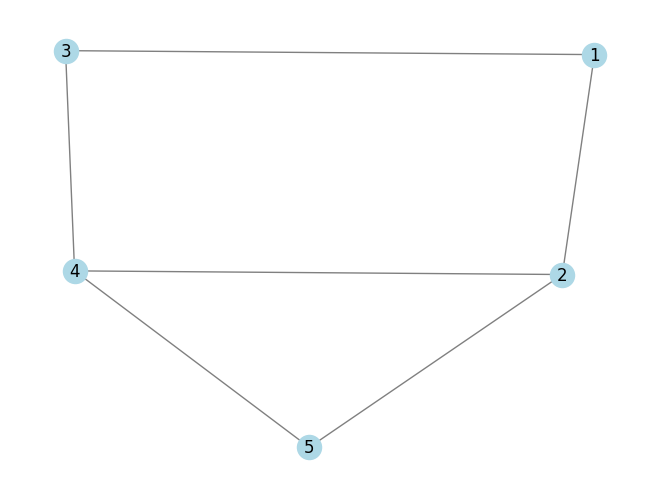

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve

# Cargar los datos
from sklearn.datasets import load_digits
digits = load_digits()

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=100)

# Entrenar modelos KNN
knn_default = KNeighborsClassifier()
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_100 = KNeighborsClassifier(n_neighbors=100)

knn_default.fit(X_train, y_train)
knn_1.fit(X_train, y_train)
knn_100.fit(X_train, y_train)

# Obtener las predicciones
y_pred_default = knn_default.predict(X_test)
y_pred_1 = knn_1.predict(X_test)
y_pred_100 = knn_100.predict(X_test)

# Obtener las métricas
from sklearn.metrics import accuracy_score, f1_score, classification_report
print("KNN con configuración por defecto:")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print("F1-score (weighted):", f1_score(y_test, y_pred_default, average='weighted'))
print(classification_report(y_test, y_pred_default, zero_division=0))

print("KNN con 1 vecino más cercano:")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("F1-score (weighted):", f1_score(y_test, y_pred_1, average='weighted'))
print(classification_report(y_test, y_pred_1, zero_division=0))

print("KNN con 100 vecinos más cercanos:")
print("Accuracy:", accuracy_score(y_test, y_pred_100))
print("F1-score (weighted):", f1_score(y_test, y_pred_100, average='weighted'))
print(classification_report(y_test, y_pred_100, zero_division=0))

# Definir función para graficar Learning Curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Grafos

import networkx as nx

# Creamos un grafo vacío
G = nx.Graph()

# Agregamos los nodos
G.add_nodes_from(range(1, 6))

# Agregamos las aristas
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 4)
G.add_edge(2, 5)
G.add_edge(3, 4)
G.add_edge(4, 5)

# Dibujamos el grafo
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')

# Curva ROC

La curva ROC se usa para evaluar la capacidad de precisión de alguna prueba. En esta curva se compara que tan probable es que haya falsos positivos, o datos que perjudiquen de algún modo nuestro estudio, que puedan haber sido causados por un fallo de detección por los sensores o a la hora del guardado dentro de la base de datos.

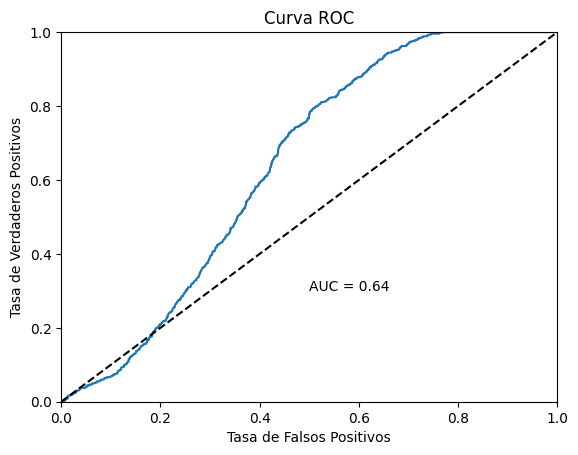

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Con esto buscamos que tan certeras seran las predicciones de nuestro modelo

# Cargar el csv
df = pd.read_csv('clusterizado_1.csv', sep=';')

# Definir la variable objetivo (Cluster 0 o no)
df['target'] = df['cluster'].apply(lambda x: 1 if x == 0 else 0)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[['dia', 'LAEQ']], df['target'], test_size=0.3, random_state=42)

# Entrenar un modelo de regresión logística
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Generar la curva ROC y calcular el AUC
y_pred_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.plot(fpr, tpr)
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.text(0.5, 0.3, 'AUC = {:.2f}'.format(auc))
plt.show()

Como se puede observar en la gráfica la curva ROC nos indica que la mayoría de los valores son correctos, es decir, es poco probable que los datos hayan sido tomados o guardados de manera incorrecta. Respecto a lo que pone de AUC, son las siglas en inglés de Area Under the Curve, lo que te dice es que tan capaz es nuestro modelo de distinguir entre las diferentes clases, siendo el mejor de los casos un AUC de 1, pero un AUC de 0.64 también está bien.